<a href="https://colab.research.google.com/github/ArtNellas/Colabs/blob/main/Copy_of_Prelim_Nellas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prelims(Run all codes)

##Preliminaries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

##Loading and Cleaning the Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Prelims_Nellas/tiktok_dataset.csv")
display(df)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [ ]:
df.drop(['video_id', 'video_transcription_text'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #                     19382 non-null  int64  
 1   claim_status          19084 non-null  object 
 2   video_duration_sec    19382 non-null  int64  
 3   verified_status       19382 non-null  object 
 4   author_ban_status     19382 non-null  object 
 5   video_view_count      19084 non-null  float64
 6   video_like_count      19084 non-null  float64
 7   video_share_count     19084 non-null  float64
 8   video_download_count  19084 non-null  float64
 9   video_comment_count   19084 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
df['video_view_count'].fillna(df['video_view_count'].mean(), inplace = True)
df['video_like_count'].fillna(df['video_like_count'].mean(), inplace = True)
df['video_share_count'].fillna(df['video_share_count'].mean(), inplace = True)
df['video_download_count'].fillna(df['video_download_count'].mean(), inplace = True)
df['video_comment_count'].fillna(df['video_comment_count'].mean(), inplace = True)

In [ ]:
df['claim_status'] = df['claim_status'].map({'opinion':0, 'claim':1})

In [ ]:
df['claim_status'].fillna(df['claim_status'].median(), inplace = True)

In [ ]:
df = pd.get_dummies(df, columns = ['verified_status'], drop_first = True)
df = pd.get_dummies(df, columns = ['author_ban_status'], drop_first = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   #                               19382 non-null  int64  
 1   claim_status                    19382 non-null  float64
 2   video_duration_sec              19382 non-null  int64  
 3   video_view_count                19382 non-null  float64
 4   video_like_count                19382 non-null  float64
 5   video_share_count               19382 non-null  float64
 6   video_download_count            19382 non-null  float64
 7   video_comment_count             19382 non-null  float64
 8   verified_status_verified        19382 non-null  bool   
 9   author_ban_status_banned        19382 non-null  bool   
 10  author_ban_status_under review  19382 non-null  bool   
dtypes: bool(3), float64(6), int64(2)
memory usage: 1.2 MB


##Training and Testing Prep

In [ ]:
X = df.drop('claim_status', axis = 1)
y= df['claim_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

##KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
print('Classification Report\n', classification_report(y_test, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))

Accuracy:  0.9989682744389993
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1924
         1.0       1.00      1.00      1.00      1953

    accuracy                           1.00      3877
   macro avg       1.00      1.00      1.00      3877
weighted avg       1.00      1.00      1.00      3877

Confusion Matrix
 [[1924    0]
 [   4 1949]]


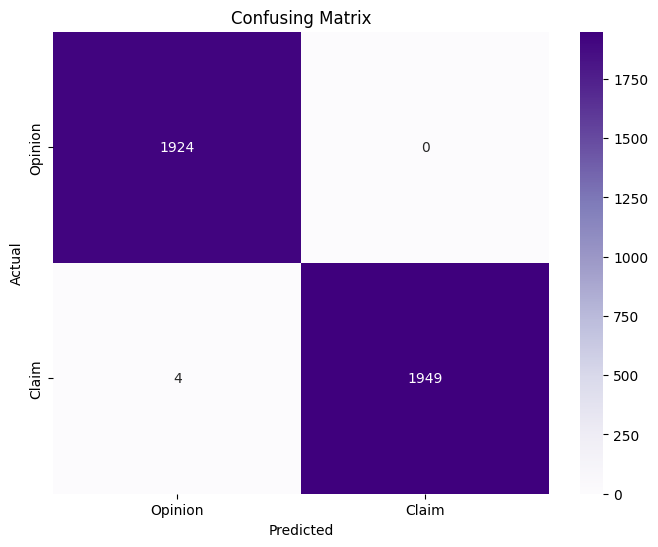

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Purples', xticklabels = ['Opinion', 'Claim'], yticklabels = ['Opinion', 'Claim'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusing Matrix')
plt.show()

##Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 30)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
print('Classification Report\n', classification_report(y_test, y_pred, target_names = ['Opinion', 'Claim']))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))

Accuracy:  0.9989682744389993
Classification Report
               precision    recall  f1-score   support

     Opinion       1.00      1.00      1.00      1924
       Claim       1.00      1.00      1.00      1953

    accuracy                           1.00      3877
   macro avg       1.00      1.00      1.00      3877
weighted avg       1.00      1.00      1.00      3877

Confusion Matrix
 [[1924    0]
 [   4 1949]]


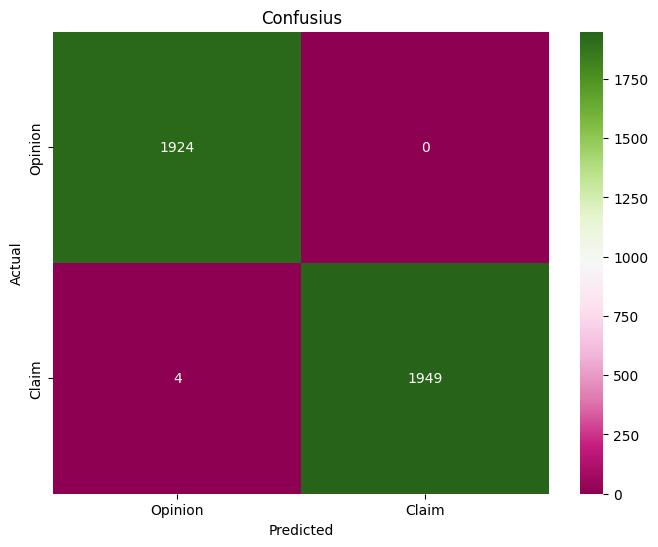

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'PiYG', xticklabels = ['Opinion', 'Claim'], yticklabels = ['Opinion', 'Claim'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Interpretations

##Data Cleansing Interpretations

- The data set is about whether or not a TikTok video is featuring a `claim` or an `opinion`. Thus, the models to be made later on would be to predict whether or not a video is under `claim` or  `opinion`
- Columns or "factors" that are not related nor contribute anything to the `claim_status` such as `video_id` and `video_transcription_text` are dropped for a more accurate model performance
- columns that present metrics such as the **view, like, share, download, and comment count, and the video duration** are kept as it may shed light as to why the `claim_status` is such for the each respective video. It may also be helpful when assessing the relationship between the variables and how they affect each other. The same can be said for the `author_ban_status_banned`, `author_ban_status_under_review`, and `verified_author_verified` columns.
- Null values for the remaining columns were replaced with estimate values. For `claim_status`, the median was used to fill null values, while the metric-based columns were filled using their respective means.
- Finally, for a more uniform dataset, `object` data were converted to `bool` to avoid any errors with the training model.

##KNN Interpretations

- The model was assigned a 70-30 split and 80-20 split for the training-testing ratios, however, both yielded similar results.
- The model did amazing as, simply put, there are 1.00s accross the board. It did nigh-perfectly in predicting `opinion` videos and perfectly with the `claim videos`
- However, the `Confusion Matrix` gives a little more detail as to why the accuracy of the model itself is not 100%. According to the graph, the model predicted 4 entries to be under `opinion` when the actual classification is `claim`. Despite this small mishap, the precision, recall, and f1-score value of `0.0` are all 1.00 as either the mistake seems negligent to the machine or the machine rounded the values up.
- The `Confusion Matrix`, aptly named "Confusion Matrix", supports the metrics of the KNN by showing the results of the testing. It predicted 1924 `opinion` videos correctly with 4 mistakes but all its `claim` predictions turned out ot be correct
- With all these metrics and results in mind, the model ends up with an astounding "0.998" or approximately 99% for its `Accuracy`, finishing with a near-perfect performance.

##Random Forest Interpretations

- The model, from performance to set up, is very similar to the KNN model used. In terms of numbers, the only real difference is in the `Confusion Matrix` with having more testing data for the `claim` than the KNN. Thus, for a more detailed explanation, please refer to the `KNN Interpretations`

##Conclusion

- In conclusion, both models end up with an approximate 99% accuracy with 1.00s accross all metrics. Thus, we can conclude that the models are highly accurate.